In [1]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [2]:
df = pd.read_csv("data/steel_data.csv", sep=';', decimal=',', index_col=0)

In [3]:
df.head()

,nplv,DT,МАРКА,ПРОФИЛЬ,t вып-обр,t обработка,t под током,t продувка,ПСН гр.,чист расход C,...,химшлак первый MnO_1,химшлак первый R_1,химшлак первый SiO2_1,химшлак последний Al2O3,химшлак последний CaO,химшлак последний FeO,химшлак последний MgO,химшлак последний MnO,химшлак последний R,химшлак последний SiO2
0,г6837?3<87?,2070-06-21 00:14:00,Э76ХФ,Р65,29.0,45.366667,24.400000,41.033333,NaN,0.456460,...,0.12,2.6,NaN,NaN,53.4,1.0,5.8,0.15,2.6,NaN
1,г683863<886,2070-06-21 01:07:00,Э76ХФ,Р65,26.0,44.066667,13.866667,44.066667,NaN,0.359285,...,0.14,2.2,NaN,NaN,59.3,0.6,4.1,0.11,2.3,NaN
2,г683863<887,2070-06-21 02:00:00,Э76ХФ,Р65,24.0,43.350000,17.950000,43.350000,NaN,0.331665,...,0.12,2.6,NaN,NaN,57.2,0.5,8.1,0.13,2.3,NaN
3,г683863<888,2070-06-21 02:58:00,Э76ХФ,Р65,17.0,46.183333,19.816667,46.183333,NaN,0.377945,...,0.11,2.4,NaN,NaN,60.3,0.5,6.3,0.12,2.6,NaN
4,г683863<889,2070-06-21 03:50:00,Э76ХФ,Р65,20.0,48.500000,17.033333,48.500000,NaN,0.389875,...,0.12,2.4,NaN,NaN,60.3,0.6,4.5,0.09,2.5,NaN


In [4]:
df.columns
target_features = ['химшлак последний SiO2', 'химшлак последний R','химшлак последний CaO','химшлак последний Al2O3'][::-1]

In [5]:
df.drop(['nplv', 'DT'], axis=1, inplace=True);

In [6]:
df.fillna(0, inplace=True)

In [7]:
itarget_features = df.columns.get_indexer(target_features)
itarget_features

array([75, 76, 80, 81], dtype=int64)

In [8]:
df.iloc[:,6]

0       0.000000
1       0.000000
2       0.000000
3       0.000000
4       0.000000
          ...   
7036    3.380628
7037    0.000000
7038    2.263004
7039    3.000000
7040    3.000000
Name: ПСН гр., Length: 7041, dtype: float64

In [9]:
df.columns

Index(['МАРКА', 'ПРОФИЛЬ', 't вып-обр', 't обработка', 't под током',
       't продувка', 'ПСН гр.', 'чист расход C', 'чист расход Cr',
       'чист расход Mn', 'чист расход Si', 'чист расход V',
       'температура первая', 'температура последняя', 'Ar (интенс.)',
       'N2 (интенс.)', 'эл. энергия (интенс.)', 'произв жидкая сталь',
       'произв количество обработок', 'произв  количество плавок',
       'произв количество плавок (цел)', 'расход газ Ar', 'расход газ  N2',
       'расход C пров.', 'сыпуч известь РП', 'сыпуч кварцит',
       'сыпуч кокс пыль УСТК', 'сыпуч  кокс. мелочь (сух.)',
       'сыпуч  кокс. мелочь КМ1', 'сыпуч  шпат плав.', 'ферспл CaC2',
       'ферспл FeMo', 'ферспл FeSi-75', 'ферспл FeV азот.', 'ферспл  FeV-80',
       'ферспл  Mn5Si65Al0.5', 'ферспл  Ni H1 пласт.', 'ферспл SiMn18',
       'ферспл  ферванит', 'ферспл  фх850А', 'эл. энергия',
       'химсталь первый Al_1', 'химсталь первый C_1', 'химсталь первый Cr_1',
       'химсталь первый Cu_1', 'химста

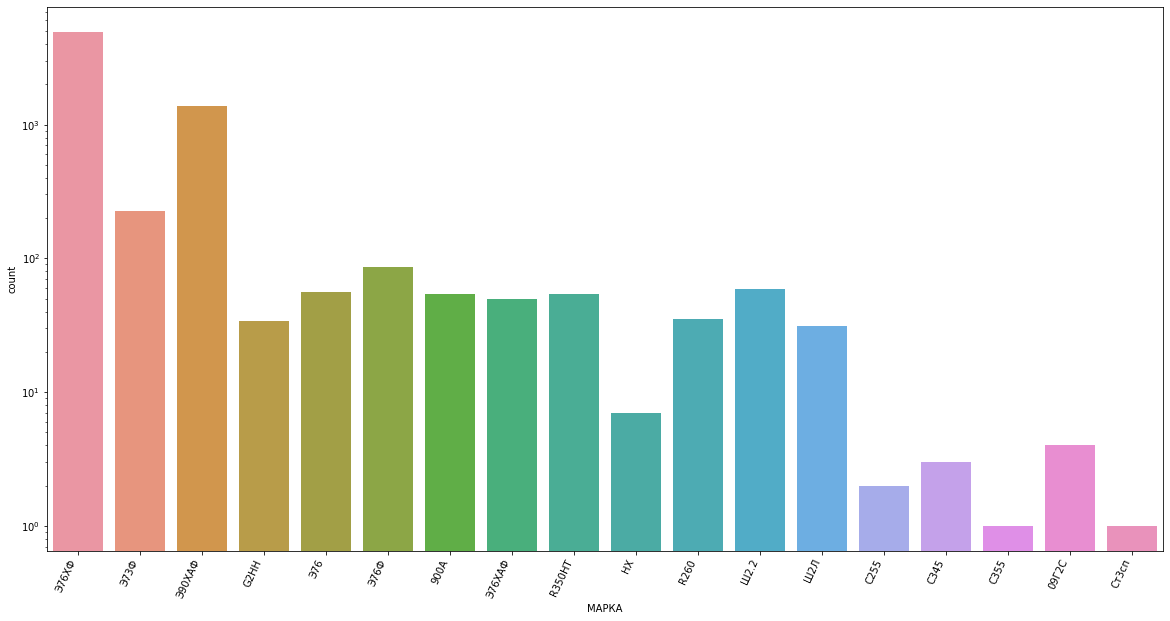

In [10]:
# the most popular mark of steel
plt.figure(figsize=(20,10))
chart = sns.countplot(df.iloc[:,0])
chart.set_yscale('log')
ch = chart.set_xticklabels(chart.get_xticklabels(), rotation=65, horizontalalignment='right')

In [11]:
counts = df.iloc[:, 0].value_counts()
predict_label = counts.index[counts.argmax()]

In [12]:
predict_label

'Э76ХФ'

In [13]:
# metrics and stuff
from sklearn.model_selection import cross_validate
from sklearn.model_selection import ShuffleSplit
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.metrics import make_scorer
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import FunctionTransformer
from sklearn.preprocessing import PolynomialFeatures
from sklearn.decomposition import PCA
from sklearn.compose import ColumnTransformer

In [14]:
# models
from sklearn.pipeline import Pipeline
from sklearn.linear_model import ElasticNet
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor 
from sklearn.ensemble import GradientBoostingRegressor

In [15]:
df.head()

,МАРКА,ПРОФИЛЬ,t вып-обр,t обработка,t под током,t продувка,ПСН гр.,чист расход C,чист расход Cr,чист расход Mn,...,химшлак первый MnO_1,химшлак первый R_1,химшлак первый SiO2_1,химшлак последний Al2O3,химшлак последний CaO,химшлак последний FeO,химшлак последний MgO,химшлак последний MnO,химшлак последний R,химшлак последний SiO2
0,Э76ХФ,Р65,29.0,45.366667,24.400000,41.033333,0.0,0.456460,0.059572,0.117446,...,0.12,2.6,0.0,0.0,53.4,1.0,5.8,0.15,2.6,0.0
1,Э76ХФ,Р65,26.0,44.066667,13.866667,44.066667,0.0,0.359285,0.083738,0.160923,...,0.14,2.2,0.0,0.0,59.3,0.6,4.1,0.11,2.3,0.0
2,Э76ХФ,Р65,24.0,43.350000,17.950000,43.350000,0.0,0.331665,0.081490,0.132332,...,0.12,2.6,0.0,0.0,57.2,0.5,8.1,0.13,2.3,0.0
3,Э76ХФ,Р65,17.0,46.183333,19.816667,46.183333,0.0,0.377945,0.133194,0.221605,...,0.11,2.4,0.0,0.0,60.3,0.5,6.3,0.12,2.6,0.0
4,Э76ХФ,Р65,20.0,48.500000,17.033333,48.500000,0.0,0.389875,0.105094,0.169459,...,0.12,2.4,0.0,0.0,60.3,0.6,4.5,0.09,2.5,0.0


In [16]:
scoring = {
    'r^2': make_scorer(r2_score),
    'mae': make_scorer(mean_absolute_error),
    'mse': make_scorer(mean_squared_error),
    }
x_features = np.arange(0, df.shape[1])
x_features = x_features[np.isin(x_features, itarget_features, invert=True)]
X_m = df.iloc[:, x_features].values
y = df.iloc[:, itarget_features].values
X_m.shape

(7041, 78)

In [17]:
idx = np.arange(0, X_m.shape[1])
LinearTransformer = FunctionTransformer(np.array)
cat_features = np.array([0,1],dtype=np.int32)
num_features = idx[np.isin(idx, cat_features, invert=True)]
preprocessor = ColumnTransformer([
    ('num', StandardScaler(), num_features),
    ('cat', OneHotEncoder(), cat_features)
])

X = preprocessor.fit_transform(X_m)

X.shape

(7041, 112)

In [18]:
cv = ShuffleSplit(n_splits=5, test_size=.2, random_state=1)
EN1 = Pipeline([
    ('reg', ElasticNet(alpha=1, l1_ratio=.5, max_iter=5000))
])

In [19]:
def test_model(model, X_, y_, cv_, show=False):
    results = []
    for i in range(0, y_.shape[1]):
        rs = cross_validate(model, X_, y_[:,i], cv=cv_, scoring=scoring)
        results.append(pd.DataFrame.from_dict(rs))
        if show:
            display(results[i])
    return results

def score_table(results):
    r = np.array(list(map(lambda x: x.mean(), results)))
    cross_table = pd.DataFrame(r, index=target_features, columns=results[0].columns)
    return cross_table

In [20]:
results = test_model(EN1, X, y, cv)
score_table(results)

,fit_time,score_time,test_r^2,test_mae,test_mse
химшлак последний Al2O3,0.032003,0.001400,0.756702,0.948320,1.286555
химшлак последний CaO,0.160305,0.001400,0.947193,2.930839,13.393057
химшлак последний R,0.035804,0.001199,0.365259,0.320449,0.297255
химшлак последний SiO2,0.024204,0.001798,0.890431,3.247125,14.193924


In [21]:
RF1 = Pipeline([
    ('reg', RandomForestRegressor(
        n_estimators=100, 
        max_features=X.shape[1]//3, 
        random_state=1
        ))
])
results_rf1 = test_model(RF1, X, y, cv, show=False)
score_table(results_rf1)

,fit_time,score_time,test_r^2,test_mae,test_mse
химшлак последний Al2O3,4.357511,0.029202,0.937448,0.331042,0.330612
химшлак последний CaO,6.134724,0.039402,0.962779,2.240627,9.437674
химшлак последний R,5.318888,0.032203,0.954695,0.111297,0.021203
химшлак последний SiO2,4.502252,0.031601,0.982532,0.985908,2.258678


In [22]:
# faile
RF2 = Pipeline([
    ('reg', RandomForestRegressor(
        n_estimators=200, 
        max_features=X.shape[1]//3, 
        random_state=1
        ))
])
results_rf2 = test_model(RF2, X, y, cv, show=False)
score_table(results_rf2)

,fit_time,score_time,test_r^2,test_mae,test_mse
химшлак последний Al2O3,8.681070,0.056006,0.937781,0.330027,0.328849
химшлак последний CaO,12.192431,0.076206,0.962970,2.234279,9.388940
химшлак последний R,10.615946,0.063403,0.954876,0.111235,0.021118
химшлак последний SiO2,9.476542,0.075807,0.982656,0.983556,2.242896


In [23]:
RF3 = Pipeline([
    ('reg', GradientBoostingRegressor(
        n_estimators=100, 
        learning_rate=1e-1,
        criterion='friedman_mse',
        max_features=X.shape[1]//3, 
        random_state=1
        ))
])
results_rf3 = test_model(RF3, X, y, cv, show=False)
score_table(results_rf3)

,fit_time,score_time,test_r^2,test_mae,test_mse
химшлак последний Al2O3,2.346373,0.004802,0.937213,0.348500,0.331872
химшлак последний CaO,2.198764,0.004403,0.962849,2.231350,9.419367
химшлак последний R,2.267174,0.004203,0.955514,0.109721,0.020822
химшлак последний SiO2,2.178764,0.003999,0.982551,1.022212,2.256160


In [24]:
KNN1 = Pipeline([
    ('reg', KNeighborsRegressor(
        n_neighbors=5,
        metric='euclidean'
        ))
])
results_knn1 = test_model(KNN1, X, y, cv, show=False)
score_table(results_knn1)

,fit_time,score_time,test_r^2,test_mae,test_mse
химшлак последний Al2O3,0.162214,1.813335,0.885185,0.453207,0.607055
химшлак последний CaO,0.155812,1.778036,0.953217,2.516037,11.863329
химшлак последний R,0.161660,1.698423,0.936375,0.131424,0.029778
химшлак последний SiO2,0.149313,1.510890,0.949506,1.414615,6.541731


In [25]:
KNN2 = Pipeline([
    ('reg', KNeighborsRegressor(
        n_neighbors=8,
        metric='euclidean'
        ))
])
results_knn2 = test_model(KNN2, X, y, cv)
score_table(results_knn2)

,fit_time,score_time,test_r^2,test_mae,test_mse
химшлак последний Al2O3,0.155411,1.520130,0.882808,0.461269,0.619452
химшлак последний CaO,0.147346,1.521424,0.956012,2.433153,11.154736
химшлак последний R,0.154112,1.706099,0.938611,0.130959,0.028732
химшлак последний SiO2,0.147014,1.523085,0.947642,1.465713,6.778341


In [26]:
KNN3 = Pipeline([
    ('reg', KNeighborsRegressor(
        n_neighbors=3,
        metric='euclidean'
        ))
])
results_knn3 = test_model(KNN3, X, y, cv)
score_table(results_knn3)

,fit_time,score_time,test_r^2,test_mae,test_mse
химшлак последний Al2O3,0.161212,1.754524,0.882396,0.453825,0.621951
химшлак последний CaO,0.148811,1.538629,0.948624,2.632023,13.029171
химшлак последний R,0.144210,1.467944,0.929607,0.136278,0.032949
химшлак последний SiO2,0.147113,1.472533,0.949920,1.399834,6.488795


In [27]:
pca = PCA(random_state=2)
pca.fit(X)

PCA(random_state=2)

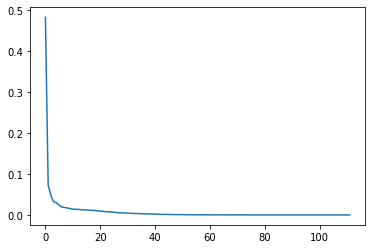

In [28]:
plt.plot(pca.explained_variance_ratio_)

In [29]:
eps_ = 1e-3
evr = pca.explained_variance_ratio_
n_features = np.arange(0, evr.shape[0])[evr < eps_][0]

In [30]:
LR2 = Pipeline([
    ('pca', PCA(random_state=2, n_components=n_features)),
    ('poly', PolynomialFeatures(degree=2)),
    ('reg', ElasticNet())
])

In [31]:
results_lr2 = test_model(LR2, X, y, cv, show=False)
score_table(results_lr2)

,fit_time,score_time,test_r^2,test_mae,test_mse
химшлак последний Al2O3,1.546448,0.020201,0.658693,1.015378,1.804451
химшлак последний CaO,0.709509,0.022160,0.954889,2.494349,11.440431
химшлак последний R,0.347720,0.021502,0.902026,0.176709,0.045876
химшлак последний SiO2,3.523868,0.019000,0.884433,2.876390,14.966677


In [32]:
x_features = np.arange(0, df.shape[1])
x_features = x_features[np.isin(x_features, itarget_features, invert=True)]
X_m = df.iloc[:, x_features]
y_n = df.iloc[:, itarget_features].values
X_w_marks = X_m.iloc[:, 1:]
X_train_mask = ~(X_m.iloc[:,0] == predict_label)
X_test_mask = X_m.iloc[:,0] == predict_label

In [33]:
idx = np.arange(0, X_w_marks.shape[1])
cat_features_pred = np.array([0,],dtype=np.int32)
num_features_pred = idx[np.isin(idx, cat_features_pred, invert=True)]
preprocessor = ColumnTransformer([
    ('num', StandardScaler(), num_features_pred),
    ('cat', OneHotEncoder(), cat_features_pred)
])

X_n = preprocessor.fit_transform(X_w_marks)
X_n.shape

(7041, 94)

In [34]:
from sklearn.model_selection import train_test_split

In [35]:
X_train = X_n[X_train_mask]
X_test = X_n[X_test_mask]
Y_train = y_n[X_train_mask]
Y_test = y_n[X_test_mask]
_, X_valid, _, Y_valid = train_test_split(X_test, Y_test, test_size=.1, random_state=3)

In [36]:
RF1_1 = Pipeline([
    ('reg', RandomForestRegressor(
        n_estimators=100, 
        max_features=X.shape[1]//3, 
        random_state=1
        ))
])

def sup_test(X_train, Y_train, X_valid, Y_valid):
    rs = {'r2':[], 'mae':[], 'mse':[]}
    for i in range(0, Y_train.shape[1]):
        RF1_1.fit(X_train, Y_train[:,i])
        preds = RF1_1.predict(X_valid)
        rs['r2'].append(r2_score(Y_valid[:,i], preds))
        rs['mae'].append(mean_absolute_error(Y_valid[:,i], preds))
        rs['mse'].append(mean_squared_error(Y_valid[:,i], preds))

    return pd.DataFrame(rs, index=target_features)

In [37]:
sup_test(X_train, Y_train, X_train, Y_train)

,r2,mae,mse
химшлак последний Al2O3,0.990877,0.136785,0.048274
химшлак последний CaO,0.988729,0.892975,1.403566
химшлак последний R,0.986999,0.044178,0.003188
химшлак последний SiO2,0.997105,0.394881,0.349818


In [38]:
sup_test(X_train, Y_train, X_valid, Y_valid)

,r2,mae,mse
химшлак последний Al2O3,0.939763,0.318427,0.309018
химшлак последний CaO,0.968825,2.306885,9.924435
химшлак последний R,0.962179,0.111720,0.021875
химшлак последний SiO2,0.983137,1.003101,2.314702


In [39]:
sup_test(X_train, Y_train, X_test, Y_test)

,r2,mae,mse
химшлак последний Al2O3,0.935312,0.338758,0.337685
химшлак последний CaO,0.969585,2.257968,9.523040
химшлак последний R,0.961519,0.112360,0.021891
химшлак последний SiO2,0.981463,1.057700,2.464733


In [40]:
sup_test(X_n, y_n, X_test, Y_test)

,r2,mae,mse
химшлак последний Al2O3,0.992092,0.116034,0.041282
химшлак последний CaO,0.996044,0.791279,1.238557
химшлак последний R,0.995238,0.038385,0.002709
химшлак последний SiO2,0.997730,0.351621,0.301857
